# GA DAT 19 Final Project
Esther Teplitsky
March 2016

Data source: ["CrunchBase 2013 Snapshot" © 2013](https://data.crunchbase.com/v3/docs/2013-snapshot)
This is historical CrunchBase data from December 2013 provided for experimentation.

In [1]:
# imports
import sys
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

#import nltk
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import cross_val_score
#from sklearn.naive_bayes import MultinomialNB #assumes multinomial distribution of probabilities
#from sklearn import metrics

#from sklearn.cross_validation import cross_val_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler

#from bokeh.plotting import figure,show,output_notebook
#from bokeh.models import Range1d
#output_notebook()

#note for later: check out pd.datetimeindex

## Part 1: Importing the Data

In [2]:
# list of files of raw mysql dump data

cbfiles = ['cb_ipos.sql','cb_relationships.sql', 'cb_people.sql', 'cb_offices.sql', \
            'cb_milestones.sql', 'cb_investments.sql', 'cb_funds.sql', 'cb_funding_rounds.sql', \
            'cb_degrees.sql', 'cb_acquisitions.sql', 'cb_objects.sql']

In [3]:
# function that creates dataframe from crunchbase mysql dump file
        
def cbdf(name):
    columns=[]
    with open(name,'r') as ipos:
        for line in ipos:
            if 'NULL,\n' in line:
                columns.append(line.split('"')[1])
            if line.startswith('INSERT INTO'):
                values=line.partition('VALUES (')[2][:-3]
                values = values.split('),(')
                values = [i.split(',') for i in values]
                df = pd.DataFrame.from_records(values)
                df = df[df.columns[:len(columns)]]
                df.columns=columns
                return df

In [4]:
#create dataframes from all files
dfs=[cbdf(names) for names in cbfiles]                    

In [5]:
#create variable names for all the dataframes
cb_ipos = dfs[0]
cb_relationships = dfs[1]
cb_people = dfs[2]
cb_offices = dfs[3]
cb_milestones = dfs[4]
cb_investments = dfs[5]
cb_funds = dfs[6]
cb_funding_rounds = dfs[7]
cb_degrees = dfs[8]
cb_acquisitions = dfs[9]
cb_objects = dfs[10]

## Part 2: Data Exploration

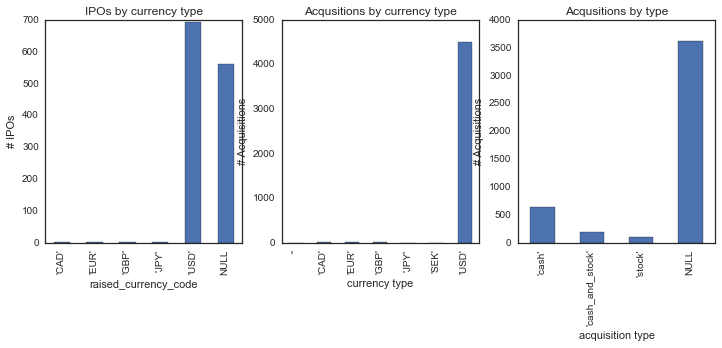

In [6]:
#plotting some initial relationships
temp1 = cb_ipos.groupby('raised_currency_code').ipo_id.count()
temp2 = cb_acquisitions.groupby('price_currency_code').acquisition_id.count()
temp3 = cb_acquisitions.groupby('term_code').acquisition_id.count()

fig = plt.pyplot.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.set_xlabel('currency type')
ax1.set_ylabel('# IPOs')
ax1.set_title("IPOs by currency type")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(132)
temp2.plot(kind = 'bar')
ax2.set_xlabel('currency type')
ax2.set_ylabel('# Acquisitions')
ax2.set_title("Acqusitions by currency type")

ax3 = fig.add_subplot(133)
temp3.plot(kind = 'bar')
ax3.set_xlabel('acquisition type')
ax3.set_ylabel('# Acquisitions')
ax3.set_title("Acqusitions by type")

In [7]:
print cb_ipos.info()
print cb_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 13 columns):
id                         1259 non-null object
ipo_id                     1259 non-null object
object_id                  1259 non-null object
valuation_amount           1259 non-null object
valuation_currency_code    1259 non-null object
raised_amount              1259 non-null object
raised_currency_code       1259 non-null object
public_at                  1259 non-null object
stock_symbol               1259 non-null object
source_url                 1259 non-null object
source_description         1259 non-null object
created_at                 1259 non-null object
updated_at                 1259 non-null object
dtypes: object(13)
memory usage: 137.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 38 columns):
id                     988 non-null object
entity_type            988 non-null object
entity_id              988 non

In [8]:
cb_objects.founded_at.value_counts()

'operating'           846
'acquired'             84
'closed'               31
'ipo'                   8
NULL                    7
'software'              2
'mobile'                2
'web'                   2
'public_relations'      1
'search'                1
'hardware'              1
'advertising'           1
'games_video'           1
'network_hosting'       1
Name: founded_at, dtype: int64

In [9]:
#tried joining the object and ipos datasets to get more information about ipoing companies.
# turned out to be only 9 matches, leaving me to believe that the data is not useful for this case. 
# missing data? incorrect key?

objipo=pd.merge(cb_objects, cb_ipos, how = 'inner', left_on = 'id', right_on='object_id')
objipo

,id_x,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,founded_at,closed_at,...,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at_y,updated_at_y
0,'c:100844','Company',100844,NULL,'Attunity','attunity','/company/attunity','software','ipo',NULL,...,NULL,'USD',NULL,'USD','2007-08-01','ATTU','http://www.attunity.com/news/attunity-receive...,'ATTUNITY receives Nasdaq�s approval to trade ...,'2013-07-16 16:05:56','2013-07-16 17:51:40'
1,'c:10106','Company',10106,NULL,'Thomson Reuters','thomson reuters','/company/thomson-reuters','public_relations','ipo','2008-04-17',...,NULL,'USD',NULL,'USD','2002-06-21','NYSE:TRI',NULL,NULL,'2013-08-26 10:53:26','2013-08-26 20:14:31'
2,'c:10166','Company',10166,NULL,'Acxiom','acxiom','/company/acxiom','software','ipo','1969-01-01',...,NULL,'USD',NULL,'USD',NULL,'NASDAQ:ACXM',NULL,NULL,'2012-04-20 02:43:36','2012-04-20 02:43:36'
3,'c:10222','Company',10222,NULL,'Hitachi','hitachi','/company/hitachi','public_relations','ipo',NULL,...,NULL,'USD',NULL,'USD','1978-01-13','NYSE:HIT',NULL,NULL,'2012-04-12 04:27:30','2012-04-12 04:27:30'
4,'c:10241','Company',10241,NULL,'Global Crossing','global crossing','/company/global-crossing','public_relations','acquired','1997-01-01',...,NULL,'USD',NULL,NULL,NULL,'NASDAQ:GLBC',NULL,NULL,'2010-11-03 04:44:51','2010-11-03 04:44:51'
5,'c:104198','Company',104198,NULL,'Integra LifeSciences Holdings','integra lifesciences holdings','/company/integra-lifesciences-holdings','biotech','ipo',NULL,...,NULL,'USD',NULL,NULL,NULL,'NASDAQ:IART',NULL,NULL,'2011-09-13 03:33:01','2011-09-13 03:33:01'
6,'c:104377','Company',104377,NULL,'Tremor Video','tremor video','/company/tremor-video','advertising','ipo','2005-01-01',...,NULL,'USD',75000000,'USD','2013-06-27','NYSE:TRMR','http://www.bizjournals.com/newyork/news/2013/...,'Tremor Video�s stock falls after IPO,Silvercrest soars','2013-05-24 05:04:39'
7,'c:10453','Company',10453,NULL,'Bankrate','bankrate','/company/bankrate','web','ipo','1993-01-01',...,NULL,'USD',NULL,'USD','2011-06-24','NYSE:RATE',NULL,NULL,'2013-08-27 07:18:08','2013-08-27 07:18:08'
8,'c:10475','Company',10475,NULL,'Abbott Labs','abbott labs','/company/abbott','biotech','ipo','1991-01-01',...,NULL,'USD',NULL,'USD','1990-01-02','NYSE:ABT',NULL,NULL,'2010-03-10 10:57:24','2013-10-28 03:07:54'


## Part 3: Changing the question

In [10]:
##Looking just at founding_rounds to try to see the relationship between funding rounds and amount raised
cb_funding_rounds['funded_at_yr'] = cb_funding_rounds['funded_at'].apply(lambda x: x.split('-')[0][1:])

In [11]:
cb_funding_rounds = cb_funding_rounds.drop(['participants', 'source_url','source_description', 'created_by' ,'created_at', 'updated_at'], axis=1)

In [12]:
cb_funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 0 to 4180
Data columns (total 16 columns):
id                          4181 non-null object
funding_round_id            4181 non-null object
object_id                   4181 non-null object
funded_at                   4181 non-null object
funding_round_type          4181 non-null object
funding_round_code          4181 non-null object
raised_amount_usd           4181 non-null object
raised_amount               4181 non-null object
raised_currency_code        4181 non-null object
pre_money_valuation_usd     4181 non-null object
pre_money_valuation         4181 non-null object
pre_money_currency_code     4181 non-null object
post_money_valuation_usd    4181 non-null object
post_money_valuation        4181 non-null object
post_money_currency_code    4181 non-null object
funded_at_yr                4181 non-null object
dtypes: object(16)
memory usage: 555.3+ KB


In [13]:
cb_funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,funded_at_yr
0,1,1,'c:4','2006-12-01','series-b','b',8500000,8500000,'USD',NULL,NULL,NULL,NULL,NULL,NULL,2006
1,2,2,'c:5','2004-09-01','angel','angel',500000,500000,'USD',NULL,NULL,'USD',NULL,NULL,'USD',2004
2,3,3,'c:5','2005-05-01','series-a','a',12700000,12700000,'USD',115000000,115000000,'USD',NULL,NULL,'USD',2005
3,4,4,'c:5','2006-04-01','series-b','b',27500000,27500000,'USD',525000000,525000000,'USD',NULL,NULL,'USD',2006
4,5,5,'c:7299','2006-05-01','series-b','b',10500000,10500000,'USD',NULL,NULL,NULL,NULL,NULL,NULL,2006


In [14]:
cb_funding_rounds.funding_round_type.value_counts()

'series-a'          1517
'angel'             1092
'series-b'           753
'series-c+'          480
'venture'            275
'other'               62
'private-equity'       1
'post-ipo'             1
Name: funding_round_type, dtype: int64

In [15]:
cb_funding_rounds.raised_currency_code.value_counts()

'USD'    3473
NULL      498
'EUR'     144
'GBP'      44
'CAD'      21
'JPY'       1
Name: raised_currency_code, dtype: int64

In [16]:
cb_funding_rounds.funding_round_code.value_counts()

'a'                  1346
'b'                   753
'seed'                711
'angel'               552
'c'                   321
'unattributed'        275
'd'                   112
'debt_round'           59
'e'                    37
'f'                    10
'grant'                 3
'post_ipo_equity'       1
'private_equity'        1
Name: funding_round_code, dtype: int64

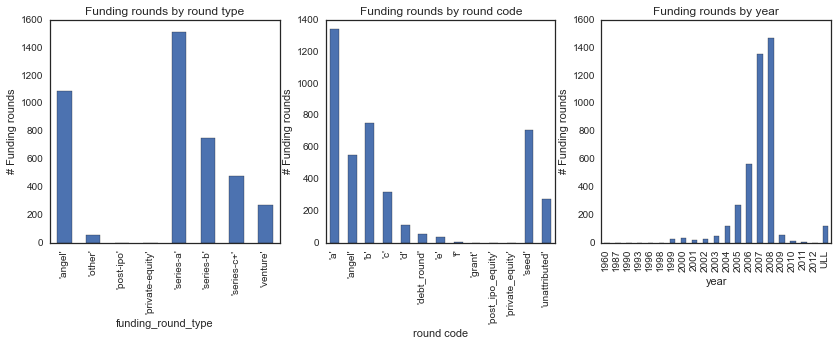

In [17]:
#exploring funding rounds
temp1 = cb_funding_rounds.groupby('funding_round_type').funding_round_type.count()
temp2 = cb_funding_rounds.groupby('funding_round_code').funding_round_code.count()
temp3 = cb_funding_rounds.groupby('funded_at_yr').funding_round_code.count()

fig = plt.pyplot.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax1.set_xlabel('round type')
ax1.set_ylabel('# Funding rounds')
ax1.set_title("Funding rounds by round type")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(132)
temp2.plot(kind = 'bar')
ax2.set_xlabel('round code')
ax2.set_ylabel('# Funding rounds')
ax2.set_title("Funding rounds by round code")

ax3 = fig.add_subplot(133)
temp3.plot(kind = 'bar')
ax3.set_xlabel('year')
ax3.set_ylabel('# Funding rounds')
ax3.set_title("Funding rounds by year")

In [18]:
cb_funding_rounds.dtypes

id                          object
funding_round_id            object
object_id                   object
funded_at                   object
funding_round_type          object
funding_round_code          object
raised_amount_usd           object
raised_amount               object
raised_currency_code        object
pre_money_valuation_usd     object
pre_money_valuation         object
pre_money_currency_code     object
post_money_valuation_usd    object
post_money_valuation        object
post_money_currency_code    object
funded_at_yr                object
dtype: object

In [19]:
#remove nulls from amount raised
cb_funding_rounds['raised_amount_usd'] = cb_funding_rounds[cb_funding_rounds.raised_amount_usd != 'NULL']

#remove some funding type outliers
#cb_funding_rounds['funding_round_code'] = cb_funding_rounds[cb_funding_rounds.funding_round_code != 'private_equity']
#cb_funding_rounds['funding_round_code'] = cb_funding_rounds[cb_funding_rounds.funding_round_code != 'post_ipo_equity']
#cb_funding_rounds['funding_round_code'] = cb_funding_rounds[cb_funding_rounds.funding_round_code != 'grant']


#cb_funding_rounds=cb_funding_rounds[mask1]
#cb_funding_rounds.raised_amount_usd.value_counts()
# mask2 = cb_funding_rounds[funding_round_type] in ['angel' , 'series-a' , 'series-b', 'series-c+']


In [20]:
cb_funding_rounds['raised_amount_usd']=cb_funding_rounds['raised_amount_usd'].astype(float)

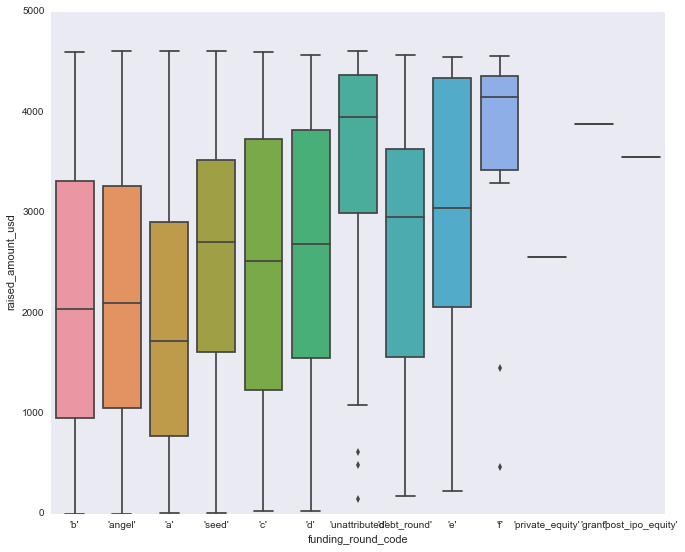

In [40]:
sns.set_style("dark")
plt.pyplot.figure(figsize=(11, 9))
sns.boxplot(x='funding_round_code', y='raised_amount_usd', data=cb_funding_rounds)

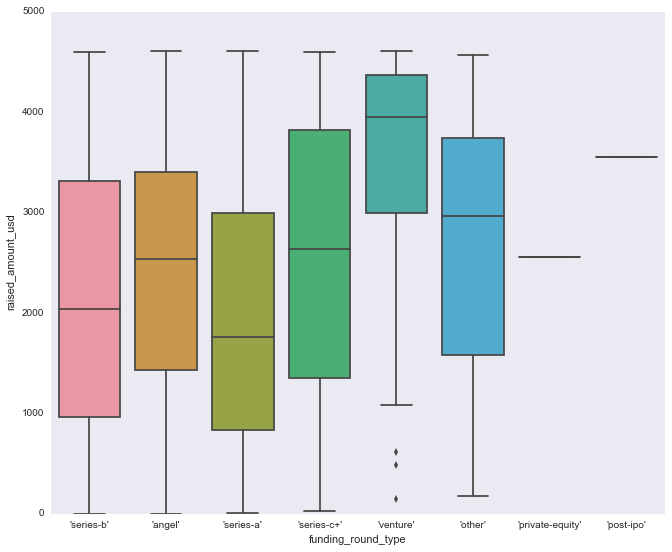

In [41]:
plt.pyplot.figure(figsize=(11, 9))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=cb_funding_rounds)

In [23]:
#mask2 = cb_funding_rounds['funding_round_type'] in ['angel' , 'series-a' , 'series-b', 'series-c+']
#mask2
#cb_funding_rounds[funding_round_type]= cb_funding_rounds[mask2]
#cb_funding_rounds[funding_round_type].valuecounts()
#sns.boxplot(x='funding_round_code', y='raised_amount_usd', data=cb_funding_rounds)


#cb_funding_rounds['raised_amount_usd'] = cb_funding_rounds[cb_funding_rounds.raised_amount_usd != 'NULL']

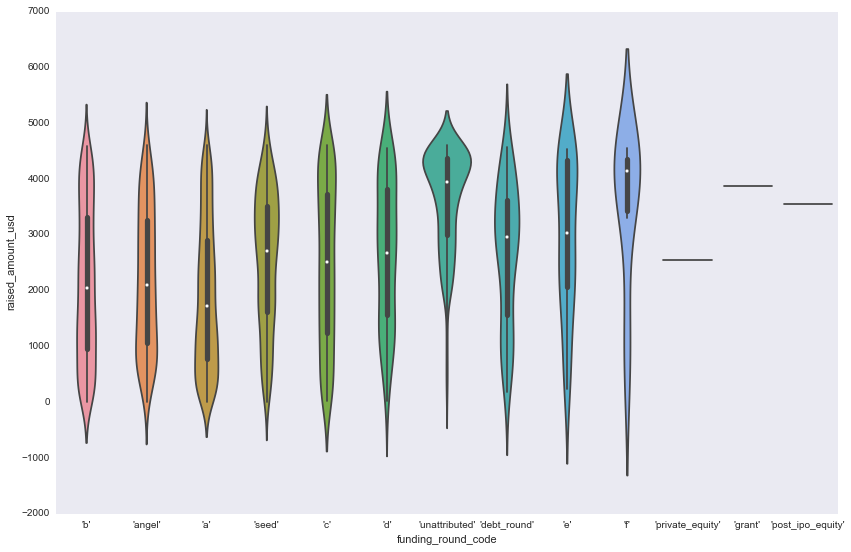

In [43]:
plt.pyplot.figure(figsize=(14, 9))
sns.violinplot(x='funding_round_code', y='raised_amount_usd', data=cb_funding_rounds, size=12)